# Goal Build all pinning services into more abstract API to upload and download dataset

* NFT Storage
* Pinata
* Estuary

In [1]:
import pandas as pd

## NFT Storage

In [1]:
from storage.nftstorage import NFTStorage

In [2]:
nft_storage = NFTStorage()

In [3]:
cred = nft_storage.get_creds()

In [6]:
response,status = nft_storage.upload_file("dataset/sample/ens_airdrop.json",cred)

In [7]:
check_file = nft_storage.get_file(response["value"]["cid"],cred)

In [9]:
nft_storage.unpin("bafybeie4yihf42kahspmhqkmovpxt2iliqqikbriwsglb6reujvzsnp5ke",cred)

<Response [202]>

# IPFS

In [1]:
from storage.ipfs import IPFS
from storage.ipfs import read_file

ipfs = IPFS()

In [2]:
# w = ipfs.add("All_Gateway_Properties.csv")

# w.json()

In [17]:
f_name = ipfs.get_file("QmWAQjxm6CKaAjHjwPSqWmN8RMecuHS1bxEufqCNVSq96e",local_node=False)

Retrieved file hash QmWAQjxm6CKaAjHjwPSqWmN8RMecuHS1bxEufqCNVSq96e from https://infura-ipfs.io Response 504


In [20]:
response = f_name.content

In [21]:
read_file(response)

,Gateway Timeout


In [4]:

df_peers = pd.DataFrame(ipfs.get_peers()["Peers"]).dropna()

df_peers["Latency"] = df_peers["Latency"].replace("n/a",None)

df_peers["Latency_float"] = df_peers["Latency"].str.strip("ms").astype("float64")

df_peers["Stream_Count"] = df_peers["Streams"].apply(lambda x: len(x))

peers = df_peers["Peer"].to_list()

In [5]:
peers[0]

'QmdEw6VDrpxW5MgrTgd2w7sNPEdhuyy4Ckzz3ZTofiU53x'

In [6]:
dht = ipfs.get_dht(peers[0])

In [151]:
dht_content = dht.content

NameError: name 'dht' is not defined

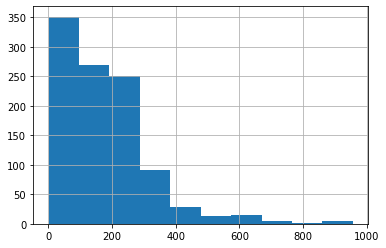

In [42]:
_ = df_peers["Latency_float"].hist()

In [43]:
df_peers.describe()

,Direction,Latency_float,Stream_Count
count,1032.000000,1032.000000,1032.000000
mean,1.521318,174.539774,1.572674
std,0.499788,143.459465,0.612313
min,1.000000,1.007211,1.000000
25%,1.000000,76.994446,1.000000
50%,2.000000,124.478240,2.000000
75%,2.000000,253.772358,2.000000
max,2.000000,955.782999,4.000000


In [44]:
df_peers

,Addr,Peer,Latency,Muxer,Direction,Streams,Latency_float,Stream_Count
0,/ip4/1.0.156.91/udp/9029/quic,12D3KooWMitEf9Xt1oTAYT7mEnnQKs5SPs34PmXn51yF1D...,361.619481ms,,1,[{'Protocol': '/ipfs/bitswap/1.2.0'}],361.619481,1
1,/ip4/1.15.231.16/udp/4001/quic,12D3KooWKyKhHtNmzDNQkxBYNttmhS5y5ZrPyrMxC24n9t...,283.074195ms,,2,"[{'Protocol': '/ipfs/bitswap/1.2.0'}, {'Protoc...",283.074195,2
2,/ip4/1.175.130.41/tcp/39845,QmTsBFNNY6EivZvYmt2tbn2HevLjrh2Mf1dUGtZNHWf6mk,284.000379ms,,2,[{'Protocol': '/ipfs/kad/1.0.0'}],284.000379,1
5,/ip4/103.1.33.178/udp/3026/quic,12D3KooWBUk5PqRPysNNJ4bPkL3ceUKxsKvt1YMFJ6RPFz...,223.167747ms,,1,[{'Protocol': '/ipfs/bitswap/1.2.0'}],223.167747,1
6,/ip4/103.146.40.138/udp/4001/quic,12D3KooWSpVv9Y7mmD8LHMMqoKtKYpSFgZ9sDP3XfxFhgX...,269.893795ms,,2,"[{'Protocol': '/ipfs/bitswap/1.2.0'}, {'Protoc...",269.893795,2
...,...,...,...,...,...,...,...,...
1083,/ip4/96.47.235.220/udp/4001/quic,12D3KooWBX4j9hGGYmRDnioddVdTPFyXesYeuHRC7Q87hk...,25.682061ms,,1,"[{'Protocol': '/ipfs/bitswap/1.2.0'}, {'Protoc...",25.682061,2
1084,/ip4/97.94.246.88/udp/2363/quic,12D3KooWBvSHjSvqnM2mGWAT8UB1KGcxPYvuW1MGMBvdSE...,118.607928ms,,1,[{'Protocol': '/ipfs/bitswap/1.2.0'}],118.607928,1
1085,/ip4/98.13.43.201/udp/60021/quic,12D3KooWEAP3iyUat8NAQMjFdfwmf7MnDpsRXSNjn1LU4Z...,47.731414ms,,1,"[{'Protocol': '/ipfs/bitswap/1.2.0'}, {'Protoc...",47.731414,2
1086,/ip4/98.186.153.34/udp/4001/quic,12D3KooWN5LzhgUGeRo4hfzkhWwkvp6F8rem5w1FuwoxyM...,107.901504ms,,1,"[{'Protocol': '/ipfs/bitswap/1.2.0'}, {'Protoc...",107.901504,2


# Pinata

In [1]:
from storage.pinataV1 import PinataV1

pinata = PinataV1()

In [2]:
cred = pinata.get_creds()

In [3]:
pinata.upload_file("dataset/sample/All_Gateway_Properties.csv",cred)

({'IpfsHash': 'QmQwwMbykhX3wyCdC5yBRXV4JQRe5FFLiyynaUiLbmvLzn',
  'PinSize': 10013,
  'Timestamp': '2022-03-25T14:00:17.329Z',
  'isDuplicate': True},
 200)

In [4]:
pinata.pin("All_Gateway_Properties.csv","QmQwwMbykhX3wyCdC5yBRXV4JQRe5FFLiyynaUiLbmvLzn",cred)

({'id': '6dda7d70-d214-457e-8d51-8b168bf95319',
  'ipfsHash': 'QmQwwMbykhX3wyCdC5yBRXV4JQRe5FFLiyynaUiLbmvLzn',
  'status': 'prechecking',
  'name': 'All_Gateway_Properties.csv'},
 200)

In [5]:
pinata.unpin("QmQwwMbykhX3wyCdC5yBRXV4JQRe5FFLiyynaUiLbmvLzn",cred)

200

In [4]:
import requests
header = {
          "pinata_api_key":cred["API Key"],
            "pinata_secret_api_key":cred["API Secret"]
          }

requests.delete("https://api.pinata.cloud/pinning/unpin/QmQwwMbykhX3wyCdC5yBRXV4JQRe5FFLiyynaUiLbmvLzn",headers=header)

<Response [200]>

In [38]:
pinata.edit_hash("Popcorn Limited - Dune Dashboards - 03182022.pdf","bafkreief472lhr6b54baq4oansiwor4ed2te2xztwgjqez2btrns5d6dxi",cred)

200

In [4]:
f_name = ipfs.get_file("QmQwwMbykhX3wyCdC5yBRXV4JQRe5FFLiyynaUiLbmvLzn",local_node=False)


NameError: name 'ipfs' is not defined

In [321]:
pinata.pin_policy("bafybeif36uqfqj5on23qfdl3nglc7ncgcbnz4ixpleomskg7pqn3xmlgfi",cred,region="FRA1",replications=1)

({'error': 'Pin policy is invalid. Please provide a valid pin policy',
  'message': 'Corrupted pin policy'},
 400)

In [322]:
pinata.globalpin_policy(cred,region="FRA1",replications=1)

({'error': {'reason': 'NOT_PERMITTED',
   'details': 'API key does not have required permissions for this endpoint'}},
 403)

## Request Files

In [17]:
import pandas as pd

"""
"sort" - Sort the results by the date added to the pinning queue (see value options below)
"ASC" - Sort by ascending dates
"DESC" - Sort by descending dates
"status" - Filter by the status of the job in the pinning queue (see potential statuses below)
"prechecking" - Pinata is running preliminary validations on your pin request.
"searching" - Pinata is actively searching for your content on the IPFS network. This may take some time if your content is isolated.
"retrieving" - Pinata has located your content and is now in the process of retrieving it.
"expired" - Pinata wasn't able to find your content after a day of searching the IPFS network. Please make sure your content is hosted on the IPFS network before trying to pin again.
"over_free_limit" - Pinning this object would put you over the free tier limit. Please add a credit card to continue pinning content.
"over_max_size" - This object is too large of an item to pin. If you're seeing this, please contact us for a more custom solution.
"invalid_object" - The object you're attempting to pin isn't readable by IPFS nodes. Please contact us if you receive this, as we'd like to better understand what you're attempting to pin.
"bad_host_node" - You provided a host node that was either invalid or unreachable. Please make sure all provided host nodes are online and reachable.
"ipfs_pin_hash" - Retrieve the record for a specific IPFS hash
"limit" - Limit the amount of results returned per page of results (default is 5, and max is 1000)
"offset" - Provide the record offset for records being returned. This is how you retrieve records on additional pages (default is 0)

MetaData
metadata[name]=exampleName

&metadata[keyvalues]={"exampleKey":{"value":"exampleValue","op":"exampleOp"},"exampleKey2":{"value":"exampleValue2","op":"exampleOp2"}}
"""
params = {"sort":"DESC","status":None,"prechecking":None,
          "searching":None,"retrieving":None,
          "expired":None,"over_free_limit":None,
          "over_max_size":None,"invalid_object":None,
          "bad_host_node":None,"ipfs_pin_hash":None,
          "limit":None,"offset":None,"metadata[name]":None,
          "metadatakeyvalues":"keyvalues"
         }

pf,status = pinata.get_pinned_files(cred,params)
pd.DataFrame(pf["rows"])

,id,ipfs_pin_hash,size,user_id,date_pinned,date_unpinned,metadata,regions
0,a4f39d27-00b9-4092-83e6-3a4d9d9e202d,QmRxu3HoofyTntXhCSXBv98tPDWLdgNee32Z1nMQcCbxU7,1640,d28f20cf-dfe0-4c8f-9272-26b9c2d8a3cd,2022-03-11T20:21:21.515Z,None,"{'name': 'storage', 'keyvalues': None}","[{'regionId': 'NYC1', 'currentReplicationCount..."
1,926f2e41-2420-4535-82c9-14e9f244a435,QmRE9W9efQjWgb9rABf4gU2SG48aabfvApUYJJBFE1BSzP,2350,d28f20cf-dfe0-4c8f-9272-26b9c2d8a3cd,2022-03-11T20:20:00.213Z,None,"{'name': 'storage', 'keyvalues': None}","[{'regionId': 'NYC1', 'currentReplicationCount..."
2,721300ed-fd44-43ef-87a4-9ed2c3c3e2b9,bafybeif36uqfqj5on23qfdl3nglc7ncgcbnz4ixpleoms...,2086898,d28f20cf-dfe0-4c8f-9272-26b9c2d8a3cd,2022-03-11T02:14:04.863Z,None,"{'name': 'test.py', 'keyvalues': {'0': 'newKey...","[{'regionId': 'NYC1', 'currentReplicationCount..."
3,3a79ae10-7392-4f0f-bafc-70543bdd6ada,QmWvvVY9meNZ6b6UXr8Vy7J2Z4eSS4YpPJ5nyrgfd7ZFMP,2290,d28f20cf-dfe0-4c8f-9272-26b9c2d8a3cd,2022-03-10T16:49:18.236Z,None,"{'name': 'happy.py', 'keyvalues': {'0': 'newKe...","[{'regionId': 'NYC1', 'currentReplicationCount..."
4,147797ca-a95a-4be0-8acd-5242d31cfe8f,QmZ8bNMNXodiWRJDvDHNCAE1EsnbaiTZaQJafm2pSTYBFh,9887,d28f20cf-dfe0-4c8f-9272-26b9c2d8a3cd,2022-03-10T15:57:40.831Z,None,"{'name': 'All_Gateway_Properties.csv', 'keyval...","[{'regionId': 'NYC1', 'currentReplicationCount..."


## Requesting Pin Jobs

In [13]:
pf,status = pinata.get_pinned_jobs(cred,params)
pf

{'count': 0, 'rows': []}

In [18]:
pinata.get_datausage(cred)

({'pin_count': 5,
  'pin_size_total': '2103065',
  'pin_size_with_replications_total': '2103065'},
 200)

In [19]:
#convert bytes to MB

2103065 * 10**-6

2.103065

# Work in Progress

# Pinata V2

In [301]:
# import requests module
import requests
import json
from requests.auth import HTTPBasicAuth

class PinataV2:
    
    def get_creds(self):

        with open("creds.json") as f:

            cred = json.loads(f.read())

        return cred["Pinata"]

    def upload_file(self,fn,cred):
        


        url = "https://managed.mypinata.cloud/api/v1/content"

        payload={}
        headers = {
          'x-api-key': cred['API Key']
        }

        response = requests.request("GET", url, headers=headers, data=payload)

        print(response.text)

        return response.json(),response.status_code

In [298]:
pinatav2 = PinataV2()

In [299]:
cred = pinatav2.get_creds()

In [300]:
pinatav2.upload_file("storage/ipfs.py",cred)

{"status":500,"message":"Request failed with status code 404"}


({'status': 500, 'message': 'Request failed with status code 404'}, 500)

# Estuary

In [146]:
import requests
import json


class Estuary:
    
    def get_creds(self):

        with open("creds.json") as f:

            cred = json.loads(f.read())

        return cred["Estuary"]
    
    def upload_file(self,fn,cred):

        base_url1 = "https://shuttle-4.estuary.tech/content/add"
        base2 = "https://shuttle-5.estuary.tech/content/add"
        
        header = {"Content-Type":"multipart/form-data",
                  "Authorization":"Bearer " + cred["API Key"],
                  }
        
        
        
        #Filename,file, content_type, cookie expiration?
        files = {'file': (fn, open(fn, 'rb'),
                          "multipart/form-data", {'Expires': '0'})
                }



        response = requests.post(base_url1, headers=header,data=files)

        return response.json(),response.status_code
    
    def get_pins(self,cred):

        base_url = "https://api.estuary.tech/pinning/pins"

        header = {"Authorization": "Bearer " + cred["API Key"]}
        
        
        response = requests.get(base_url,headers=header)

        return response.json(),response.status_code





In [147]:
e = Estuary()

In [148]:
cred = e.get_creds()

In [149]:
pins = e.get_pins(cred)

In [150]:
e.upload_file("dataset/sample/All_Gateway_Properties.csv",cred)

({'error': 'no multipart boundary param in Content-Type'}, 500)

In [114]:
import pandas as pd

pd.read_csv("dataset/sample/All_Gateway_Properties.csv")

,No.,Address,City/State/Zip
0,1,7178 COLUMBIA GATEWAY DR,"COLUMBIA, MD 21046"
1,2,7220 LEE DEFOREST DR,"COLUMBIA, MD 21046"
2,3,7224 SOLAR WALK,"COLUMBIA, MD 21046"
3,4,7230 LEE DEFOREST DR,"COLUMBIA, MD 21046"
4,5,7061 COLUMBIA GATEWAY DR,"COLUMBIA, MD 21046"
...,...,...,...
208,209,7277 CALM SUNSET,"COLUMBIA, MD 21046"
209,210,9161 COMMERCE CENTER DR,"COLUMBIA, MD 21046"
210,211,8601 ROBERT FULTON DR,"COLUMBIA, MD 21046"
211,212,6741 COLUMBIA GATEWAY DR,"COLUMBIA, MD 21046"
